<a href="https://colab.research.google.com/github/madanjha/Machine-Learning/blob/main/Gen%2Bai_ff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
from sklearn.utils import resample
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Step -1 load the data
print(f"Amazon fine food reviews data set")
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
csv_file = os.path.join(path, "Reviews.csv")
df = pd.read_csv(csv_file)

Amazon fine food reviews data set


In [ ]:
df.head(2) # 1-2-3-4-5. review-
#df['Score'].value_counts()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [ ]:
#eda  - inves
df.shape
df.columns.to_list()

['Id',
 'ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text']

In [ ]:
#EDa
print(f"Total Reviews : {len(df)}")
df.info()
df.isnull().sum()

Total Reviews : 568454
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [ ]:
df_clean = df[['Text',"Score"]].dropna()
df_clean.head(2)
print(f"After cleaning data : {len(df_clean)}") #5l reviews

#5 ratings 1,2,3,4,5
print("RATING DISTRIBUTION")
score_counts = df_clean['Score'].value_counts().sort_index()
print(score_counts)
print(f"Percentages")
for score, count in score_counts.items():
  percentage = (count/len(df_clean))*100
  print(f"{score} star : {percentage:.2f}%")

After cleaning data : 568454
RATING DISTRIBUTION
Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: count, dtype: int64
Percentages
1 star : 9.19%
2 star : 5.24%
3 star : 7.50%
4 star : 14.19%
5 star : 63.88%


In [ ]:
#1 star, 2 star 3, star
print("Sample review analysis")
for score in [1,2,3,4,5]:
  sample_review = df_clean[df_clean['Score'] == score]['Text'].iloc[0]
  print(f"{score}-star review")
  print(f"{sample_review[:200]}")

#idea senteces are grammaticlly forluate well    some /some
#no words thwet neg.pos could be

Sample review analysis
1-star review
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
2-star review
If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor
3-star review
This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't 
4-star review
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powd
5-star review
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The

In [ ]:
#data viz
df_clean['text_length'] = df_clean["Text"].str.len()
df_clean['word_count'] = df_clean['Text'].str.split().str.len()

In [ ]:
df_clean

,Text,Score,text_length,word_count
0,I have bought several of the Vitality canned d...,5,263,48
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31
2,This is a confection that has been around a fe...,4,509,94
3,If you are looking for the secret ingredient i...,2,219,41
4,Great taffy at a great price. There was a wid...,5,140,27
...,...,...,...,...
568449,Great for sesame chicken..this is a good if no...,5,149,26
568450,I'm disappointed with the flavor. The chocolat...,2,252,46
568451,"These stars are small, so you can give 10-15 o...",5,372,66
568452,These are the BEST treats for training and rew...,5,200,35


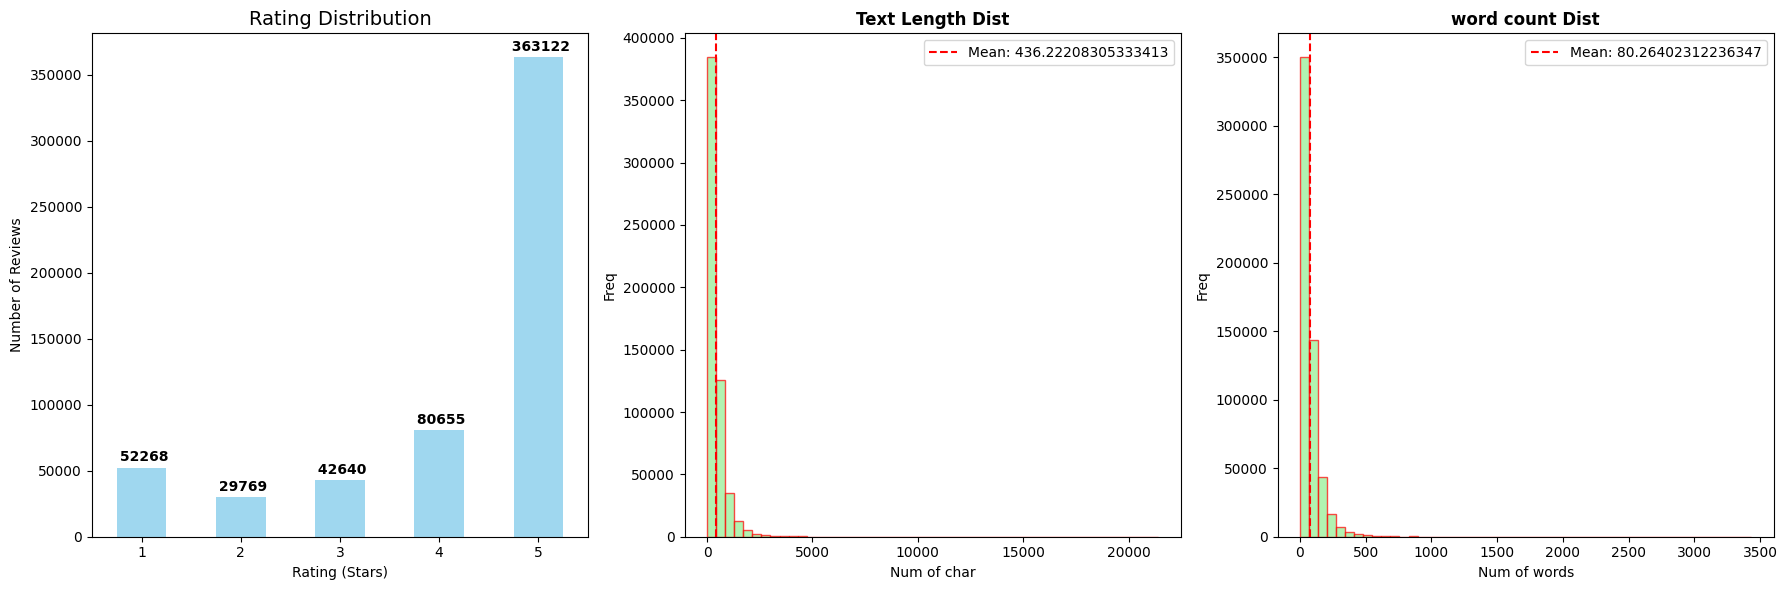

In [ ]:
#sizing the canvas
plt.figure(figsize=(18,6))

#plot-1 Rating distribbution
plt.subplot(1,3,1)
score_counts.plot(kind='bar',color='skyblue',alpha=0.8)
plt.title("Rating Distribution",fontsize=14)
plt.xlabel("Rating (Stars)")
plt.xticks(rotation=0)
plt.ylabel("Number of Reviews")
for idx, val in enumerate(score_counts.values):
  plt.text(idx,val+5000, f"{val: }", ha='center',fontweight='bold')

#plot-2 text length dist
plt.subplot(1,3,2)
plt.hist(df_clean['text_length'], bins=50, alpha=0.7, color='lightgreen', edgecolor='red')
plt.title("Text Length Dist",fontweight='bold')
plt.xlabel("Num of char")
plt.ylabel("Freq")
plt.axvline(df_clean['text_length'].mean(), color='red',linestyle="--",
            label=f"Mean: {df_clean['text_length'].mean()}")
plt.legend()

#plot-3 word count dist
plt.subplot(1,3,3)
plt.hist(df_clean['word_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='red')
plt.title("word count Dist",fontweight='bold')
plt.xlabel("Num of words")
plt.ylabel("Freq")
plt.axvline(df_clean['word_count'].mean(), color='red',linestyle="--",
            label=f"Mean: {df_clean['word_count'].mean()}")
plt.legend()

plt.tight_layout()

In [ ]:
# df_clean.head(2)

In [ ]:
#convert to binary classification
df_binary = df_clean[df_clean['Score']!= 3].copy() #aprt from 3 al 1,2,4,5
# df_binary['Score'].value_counts()

In [ ]:
df_binary['sentiment'] = (df_binary['Score']>=4).astype(int)

In [ ]:
df_binary.head(2)
#distrinution. - binary class
print(f"Negative (1-2 star): {sum(df_binary['sentiment'] == 0):,}")
print(f"Positive (4-5 star): {sum(df_binary['sentiment'] == 1):,}")

Negative (1-2 star): 82,037
Positive (4-5 star): 443,777


In [ ]:
#check imbalnce - percentage
negative_pct = (sum(df_binary['sentiment'] == 0) / len(df_binary)) * 100
positive_pct = (sum(df_binary['sentiment'] == 1) / len(df_binary)) * 100
print(f"Negative : {negative_pct}")
print(f"Positive : {positive_pct}")

if positive_pct > 70:
  print(f"Dataset is imbalanced!- skewed postive reviews")

Negative : 15.601904856089796
Positive : 84.3980951439102
Dataset is imbalanced!- skewed postive reviews


In [ ]:
#handle imbalnce

#seperations
negative_reviews = df_binary[df_binary['sentiment'] == 0]
positive_reviews = df_binary[df_binary['sentiment'] == 1]

print(f"Original Imbalance")
print(f"Negative : {len(negative_reviews):,} ({len(negative_reviews)/len(df_binary)})")
print(f"Positive : {len(positive_reviews):,} ({len(positive_reviews)/len(df_binary)})")

#[undersmaple majority class] so that match minoroty class
n_minority = len(negative_reviews)

positive_downsampled = resample(positive_reviews,
                                replace=False,  #smaple without replancement
                                n_samples=n_minority, #minoruity
                                random_state=21)

#df_balanced
df_balanced = pd.concat([negative_reviews,positive_downsampled])

#shuffle
df_balanced = df_balanced.sample(frac=1, random_state=21).reset_index(drop=True)

print(f"After balance")
print(f"Total Samples : {len(df_balanced)}")
print(f"Negative : {sum(df_balanced['sentiment'] == 0):,} ({sum(df_balanced['sentiment']==0)/len(df_balanced)**100})")
print(f"Positive : {sum(df_balanced['sentiment'] == 1):,} ({sum(df_balanced['sentiment']==1)/len(df_balanced)**100})")

Original Imbalance
Negative : 82,037 (0.15601904856089796)
Positive : 443,777 (0.843980951439102)
After balance
Total Samples : 164074
Negative : 82,037 (0.0)
Positive : 82,037 (0.0)


In [ ]:
df_binary.head(2)

,Text,Score,text_length,word_count,sentiment
0,I have bought several of the Vitality canned d...,5,263,48,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,190,31,0


In [ ]:
df_balanced.head(2)

,Text,Score,text_length,word_count,sentiment
0,Our family now uses this in place of butter or...,5,323,65,1
1,the k- cups were thrown in an oversized box wi...,1,208,41,0


In [ ]:
#take a sample
sample_size = min(50000, len(df_balanced))
df_sample = df_balanced.sample(n=sample_size, random_state=21)

sample_negative = sum(df_sample['sentiment']==0)
sample_positive = sum(df_sample['sentiment']==1)
print(f"sample_negative : {sample_negative}")
print(f"sample_positive : {sample_positive}")

sample_negative : 25061
sample_positive : 24939


In [ ]:
#clean - text -> 1) convert lowercase
                #  2) remove special character :) (U+1F60A).  #, !
                #  3) keep onlu letter and spaces
                #  4) extra whitespcae   i_love__ice-cream

In [ ]:
def clean_text(text):
  text = text.lower()
  #remove all special numbers, keeping onlu letters and spaces
  text = re.sub(r'[^a-zA-Z\s]','', text)
  #romce
  text = ' '.join(text.split())
  return text

print("+++++++Text Preprocessing++++++")
df_balanced['clean_text'] = df_balanced['Text'].apply(clean_text)
df_balanced.head(2)

# ori - clea

+++++++Text Preprocessing++++++


,Text,Score,text_length,word_count,sentiment,clean_text
0,Our family now uses this in place of butter or...,5,323,65,1,our family now uses this in place of butter or...
1,the k- cups were thrown in an oversized box wi...,1,208,41,0,the k cups were thrown in an oversized box wit...


In [ ]:
df_balanced.shape

(164074, 6)

In [ ]:
#Tokenziation
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_FEATURES = 10000 #VOCAB
MAX_LEN = 100 #maximum seq len (num of words per review) len(longhest_seq)

print(f"Max vocab size : {MAX_FEATURES} words")
print(f"Max seq len : {MAX_LEN} words")

X = df_balanced['clean_text'].values #features
y = df_balanced['sentiment'].values #lables 0 -1

tokenizer = Tokenizer(num_words=MAX_FEATURES, oov_token='<OOV>')
tokenizer.fit_on_texts(X)

#
X_sequences = tokenizer.texts_to_sequences(X)

#padding
X_padded = pad_sequences(X_sequences, maxlen=MAX_LEN, padding='post', truncating="post")

print(f"Actual Vocab size : {len(tokenizer.word_index):,} words")
print(f"Final Sequence shape : {X_padded.shape}")

#look at the final data
print(f"ActualOrg text : {X[0][:100]}")
print(f"Org text : {len(X[0][:100])}")
print(f"Sequence : {X_sequences[0][:20]}")
print(f"Padded shape : {X_padded[0].shape}")

Max vocab size : 10000 words
Max seq len : 100 words
Actual Vocab size : 113,343 words
Final Sequence shape : (164074, 100)
ActualOrg text : our family now uses this in place of butter or other oils for all our cooking needs it tastes sooo g
Org text : 100
Sequence : [118, 380, 93, 1000, 9, 11, 613, 8, 301, 36, 59, 1086, 12, 41, 118, 657, 709, 7, 129, 3126]
Padded shape : (100,)


In [ ]:
len(X[0][:100])

100

In [ ]:
#SPLIT THE DATA
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X_padded, y,
   test_size=0.20,
   random_state=42, #where 0-2^32-1
   stratify=y #maintain class balance overall by stratifieng the sample
)

print(f"Training Set : {X_train.shape[0]:,} samples")
print(f"Testing Set : {X_test.shape[0]:,} samples")
print(f"Shape of features : {X_train.shape[1]} (sequ length)")

#balnce
train_pos = sum(y_train)
test_pos = sum(y_test)

print(f"Training - pos : {train_pos:,} ({train_pos/len(y_train)*100})")
print(f"Test - pos : {test_pos:,} ({test_pos/len(y_train)*100})")

Training Set : 131,259 samples
Testing Set : 32,815 samples
Shape of features : 100 (sequ length)
Training - pos : 65,630 (50.00038092626029)
Test - pos : 16,407 (12.49971430530478)


In [ ]:
#rnn

In [ ]:
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dropout,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential

In [ ]:
def create_rnn_model():
  model = Sequential([
      #word ind to dense vector
      Embedding(input_dim=MAX_FEATURES, output_dim=128, input_length=MAX_LEN),
      SimpleRNN(units=64, return_sequences=False),
      Dropout(0.5),
      Dense(32, activation="relu"),
      Dense(1, activation='sigmoid')
  ])
  return model

rnn_model  = create_rnn_model()

rnn_model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rnn_history = rnn_model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.20,
    verbose=1
)

Epoch 1/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.5240 - loss: 0.6919 - val_accuracy: 0.5589 - val_loss: 0.6805
Epoch 2/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5536 - loss: 0.6765 - val_accuracy: 0.5572 - val_loss: 0.6724
Epoch 3/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6133 - loss: 0.6218 - val_accuracy: 0.6323 - val_loss: 0.6521
Epoch 4/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6783 - loss: 0.5660 - val_accuracy: 0.5825 - val_loss: 0.6629
Epoch 5/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6748 - loss: 0.5271 - val_accuracy: 0.5864 - val_loss: 0.7398


In [ ]:
final_train_acc = rnn_history.history['accuracy'][-1]
print(f"final_train_acc : {final_train_acc}")

final_train_acc : 0.6732693910598755


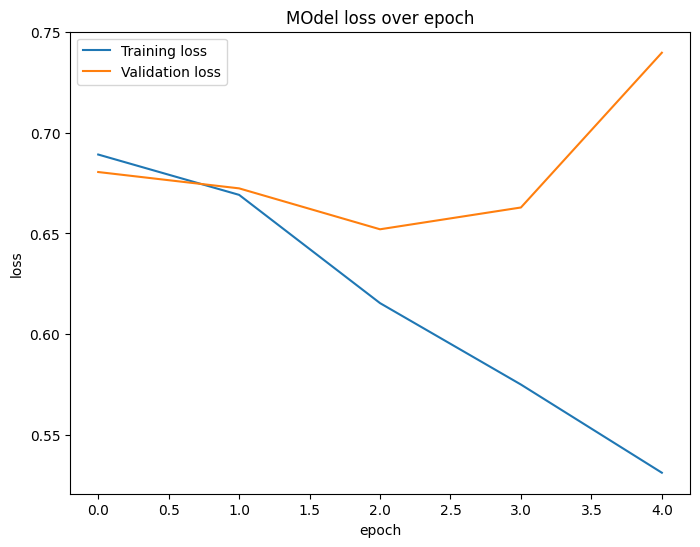

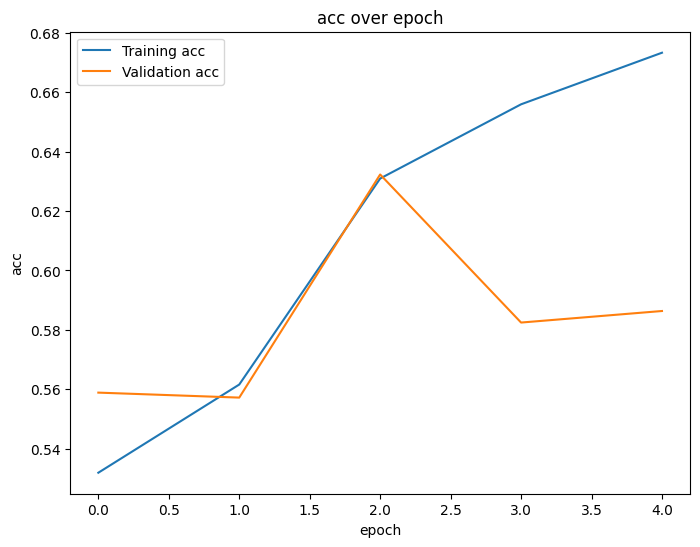

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(rnn_history.history['loss'], label='Training loss')
plt.plot(rnn_history.history['val_loss'], label='Validation loss')
plt.title("MOdel loss over epoch")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(rnn_history.history['accuracy'], label='Training acc')
plt.plot(rnn_history.history['val_accuracy'], label='Validation acc')
plt.title("acc over epoch")
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()

In [ ]:
#lstm

def create_lstm_model():
  model = Sequential([
      #word ind to dense vector
      Embedding(input_dim=MAX_FEATURES, output_dim=128, input_length=MAX_LEN),

      LSTM(units=64, return_sequences=False),
      Dropout(0.5),
      Dense(32, activation="relu"),
      Dense(1, activation='sigmoid')
  ])
  return model

lstm_model  = create_lstm_model()

lstm_model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lstm_history = lstm_model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.20,
    verbose=1
)

Epoch 1/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6169 - loss: 0.6523 - val_accuracy: 0.5561 - val_loss: 0.6878
Epoch 2/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5367 - loss: 0.6849 - val_accuracy: 0.8295 - val_loss: 0.4132
Epoch 3/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8655 - loss: 0.3344 - val_accuracy: 0.8928 - val_loss: 0.2617
Epoch 4/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9132 - loss: 0.2263 - val_accuracy: 0.9040 - val_loss: 0.2419
Epoch 5/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9330 - loss: 0.1799 - val_accuracy: 0.9140 - val_loss: 0.2256


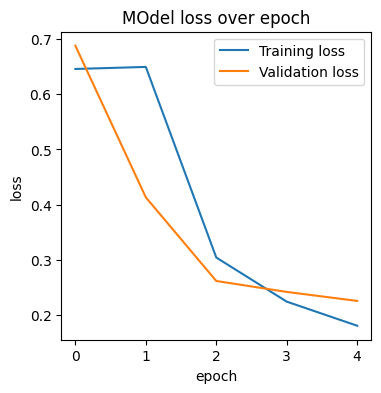

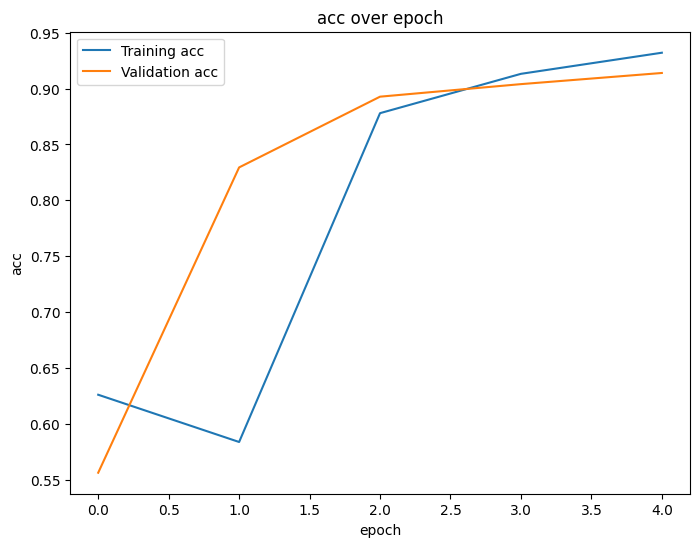

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.plot(lstm_history.history['loss'], label='Training loss')
plt.plot(lstm_history.history['val_loss'], label='Validation loss')
plt.title("MOdel loss over epoch")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(lstm_history.history['accuracy'], label='Training acc')
plt.plot(lstm_history.history['val_accuracy'], label='Validation acc')
plt.title("acc over epoch")
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()

In [ ]:
final_train_acc = lstm_history.history['accuracy'][-1]
print(f"final_train_acc : {final_train_acc}")

final_train_acc : 0.9321663975715637


In [ ]:
#hypapar

param_grid = {
    'model_type':['rnn','lstm'],
    'embedding_dim':[64,128],
    'units':[32,64,128],
    'dropout_rate':[0.30,0.50],
    'learning_rate':[0.001,0.01]
}


#search space - random search , gridsearch
for param, values in param_grid.items():
  print(f"{param}:{values}")

total_combinations = 1
for values in param_grid.values():
  total_combinations *= len(values)

print(total_combinations) #2 * 2 * 3 * 2 * 2

#helper function
def create_mode_with_param(model_type='rnn',embedding_dim=128,units=64,dropout_rate=0.5,learning_rate=0.001):
  model=Sequential([
      Embedding(MAX_FEATURES,embedding_dim,input_length=MAX_LEN)
  ])

  if model_type == 'lstm':
    model.add(LSTM(units, return_sequences=False))
  else:
    model.add(SimpleRNN(units, return_sequences=False))

  model.add(Dropout(dropout_rate))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(
      optimizer = Adam(learning_rate=learning_rate),
      loss="binary_crossentropy",
      metrics=['accuracy']
  )
  return model

model_type:['rnn', 'lstm']
embedding_dim:[64, 128]
units:[32, 64, 128]
dropout_rate:[0.3, 0.5]
learning_rate:[0.001, 0.01]
48


In [ ]:
import time

def random_search(n_trails=8):
  results = []
  np.random.seed(42)
  for i in range(n_trails):
    params = {
        'model_type': str(np.random.choice(param_grid['model_type'])),
        'embedding_dim': int(np.random.choice(param_grid['embedding_dim'])),
        'units': int(np.random.choice(param_grid['units'])),
        'dropout_rate': float(np.random.choice(param_grid['dropout_rate'])),
        'learning_rate': float(np.random.choice(param_grid['learning_rate'])),
    }

    print(f"Trail {i+1}/{n_trails}")
    print(f"Parameters : {params}")
    try:
      model = create_mode_with_param(**params)
      history = model.fit(
            X_train, y_train,
            batch_size=128,
            epochs=10,  # idea
            validation_split=0.2,
            verbose=1
        )
      val_accuracy = max(history.history['val_accuracy'])
      results.append({
            'trail':i+1,
            'params':params,
            "val_accuracy":val_accuracy,
            "model":model
        })
      print(f"Validation Accuracy. : {val_accuracy}")
    except Exception as e:
      print(f"Error in the trial run {i+1}: {e}")
      continue

  return results

In [ ]:
search_results = random_search(8)

Trail 1/8
Parameters : {'model_type': 'rnn', 'embedding_dim': 128, 'units': 32, 'dropout_rate': 0.3, 'learning_rate': 0.001}
Epoch 1/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.5271 - loss: 0.6899 - val_accuracy: 0.5144 - val_loss: 0.6831
Epoch 2/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5276 - loss: 0.6854 - val_accuracy: 0.5694 - val_loss: 0.6637
Epoch 3/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5793 - loss: 0.6366 - val_accuracy: 0.5827 - val_loss: 0.6533
Epoch 4/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6136 - loss: 0.5861 - val_accuracy: 0.5496 - val_loss: 0.6899
Epoch 5/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6113 - loss: 0.5889 - val_accuracy: 0.5694 - val_loss: 0.6948
Epoch 6/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6399 - loss: 0.5411 - val_accuracy: 0.7902 - val_loss: 0.5710
Epoch 7/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5766 - loss: 0.6724 - val_accur

In [ ]:
#find the bestr para by myself

if search_results:
  best_result = max(search_results, key=lambda x:x['val_accuracy'])

  print(f"Random search results")
  for result in search_results:
    trial = result['trail']
    acc = result['val_accuracy']
    model_type = result['params']['model_type']
    print(f"Trail {trial}: {model_type.upper()} - Accuracy : {acc}\n")

  print(f"Trial : {best_result['trail']}")
  print(f"Parameters : {best_result['params']}") #finer rnn that i ran
  print(f"Validation Acc : {best_result['val_accuracy']}")

Random search results
Trail 1: RNN - Accuracy : 0.790187418460846

Trail 2: LSTM - Accuracy : 0.9180634021759033

Trail 3: RNN - Accuracy : 0.5431205034255981

Trail 4: RNN - Accuracy : 0.6607496738433838

Trail 5: LSTM - Accuracy : 0.8957412838935852

Trail 6: LSTM - Accuracy : 0.9097973704338074

Trail 7: LSTM - Accuracy : 0.9118924140930176

Trail 8: RNN - Accuracy : 0.5621286034584045

Trial : 2
Parameters : {'model_type': 'lstm', 'embedding_dim': 64, 'units': 32, 'dropout_rate': 0.3, 'learning_rate': 0.01}
Validation Acc : 0.9180634021759033


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pickle

In [ ]:
# train my final best model early stopping model cho
if search_results:
  best_params = best_result['params']

  #Step-1 : creating the model
  best_model = create_mode_with_param(**best_params)

  #Step-2 : Setu callback
  callbacks = [
      ModelCheckpoint('best_amazon_sentiment.h5',
                      monitor='val_accuracy',
                      save_best_only = True,
                      mode='max',
                      verbose=1),
      EarlyStopping(
          monitor='val_loss',
          patience=3,
          restore_best_weights=True,
      )
  ]
  final_history = best_model.fit(
      X_train, y_train,
      batch_size=128,
      epochs=3,
      validation_split=0.20,
      callbacks=callbacks
  )

  #save the tokenizer
  with open('best_amazon_sentiment.pkl', "wb") as f:
    pickle.dump(tokenizer, f)

else:
  print("Error")

Epoch 1/3
816/821 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6576 - loss: 0.5555
Epoch 1: val_accuracy improved from -inf to 0.90393, saving model to best_amazon_sentiment.h5


821/821 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.6585 - loss: 0.5544 - val_accuracy: 0.9039 - val_loss: 0.2421
Epoch 2/3
816/821 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9163 - loss: 0.2174
Epoch 2: val_accuracy improved from 0.90393 to 0.90843, saving model to best_amazon_sentiment.h5


821/821 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9163 - loss: 0.2174 - val_accuracy: 0.9084 - val_loss: 0.2350
Epoch 3/3
821/821 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9336 - loss: 0.1806
Epoch 3: val_accuracy improved from 0.90843 to 0.91471, saving model to best_amazon_sentiment.h5


821/821 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9336 - loss: 0.1806 - val_accuracy: 0.9147 - val_loss: 0.2228


In [ ]:
#load the saved model and run as per the model
from tensorflow.keras.models import load_model

#model
loaded_model = load_model("best_amazon_sentiment.h5")
#loaded tokenizer
with open("best_amazon_sentiment.pkl", "rb") as f:
  loaded_tokenizer = pickle.load(f)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred_proba = loaded_model.predict(X_test)
#tresh 0.5 > < 0.5
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

test_accuracy = accuracy_score(y_test, y_pred)
print(f"test_accuracy : {test_accuracy}")



1026/1026 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
test_accuracy : 0.9167149169587079


In [ ]:
test_sentences = [
    "the packaging was nice but the product tested was not to my liking",
    "The customer service was excellent. They were helpful and responsive to my questions",
    "I expected my bluetooth headphones to be great but huge dissapointment... noooo bass and little highh!"
]

In [ ]:
def predict_sentiment(text):
  clean = clean_text(text)
  #convert to seq
  sequence = loaded_tokenizer.texts_to_sequences([clean]) #[]
  #padding
  padded = pad_sequences(sequence, maxlen=MAX_LEN, padding='post')
  #predict
  prob = loaded_model.predict(padded, verbose=1)[0][0] #this i am not sure
  sentiment = "Positive" if prob > 0.5 else "Negative"
  return sentiment, prob

In [ ]:
test_sentences = [
    "the packaging was nice but the product tested was not to my liking",
    "The product was excellent",
    "I expected my bluetooth headphones to be great but huge dissapointment... noooo bass and little highh!",
    "i have observed that the products that i have recieved are as per my preferences and requirements and i can not complain"
]

In [ ]:
# test_sentences[1]
predict_sentiment(test_sentences[3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


('Positive', np.float32(0.66106236))

In [ ]:
# for i, sentence in enumerate(test_sentences):
#   sentiment, probability = predict_sentiment(sentence)
#   print(f"Sentence {i+1}: '{sentence}'")
#   print(f"Prediction: {sentiment} (Probability: {probability})")

''

In [ ]:
#Encoder - Decoder (Seq2Seq)

In [ ]:
import tensorflow as tf
import numpy as np
from collections import Counter
import random

In [ ]:
data = [ ("i am happy","मैं खुश हूँ"),
         ("You are sad","आप दुखी हैं"),
         ("she is tired", "वह थक गया है"),
         ("we are hungry","हम भूखें है"),
         ("they are busy","वे व्यस्त हैं"),
         ("i am cold","मुझे ठंड लग रही है"),
         ("you are late","तुम देरी से आए हो"),
         ("she is happy", "वह खुश है"),
         ("we are ready","हम तैयार हैं")]

# data[0][0]
# data[0][1]

'मैं खुश हूँ'

In [ ]:
def build_vocab(sentences, lang): #use later
  tokens = Counter()
  for sent in sentences:
    tokens.update(sent.split())
  vocab = {"<PAD>":0, "<SOS>":1, "<EOS>":2}
  for i, token in enumerate(tokens.keys(),3):
    vocab[token] = i
  return vocab

In [ ]:
eng_sents = [pair[0] for pair in data]
hin_sent = [pair[1] for pair in data]
eng_vocab = build_vocab(eng_sents, "eng")
hin_vocab = build_vocab(hin_sent, "hin")

In [ ]:
print(f"English Vocabulary size : {len(eng_vocab)}")
print(f"Hindi Vocabulary size : {len(hin_vocab)}")

English Vocabulary size : 20
Hindi Vocabulary size : 27


In [ ]:
#converting senteces to indices
def sentence_to_indices(sent, vocab):
  indices = [vocab.get(token, vocab.get("<UNK>",0)) for token in sent.split()]
  indices = [vocab['<SOS>']] + indices + [vocab['<EOS>']]
  return indices

In [ ]:
#padding - last step  eng- hin ->
def prepare_data(data, eng_vocab, hin_vocab):
  src_data = [sentence_to_indices(pair[0], eng_vocab) for pair in data] #eng
  tgt_data = [sentence_to_indices(pair[1], hin_vocab) for pair in data] #hindi

  #pad sequnces [sos datr eos]
  src_padded = tf.keras.preprocessing.sequence.pad_sequences(
      src_data, padding='post', value=eng_vocab['<PAD>']
  )
  tgt_padded = tf.keras.preprocessing.sequence.pad_sequences(
      tgt_data, padding='post', value=hin_vocab['<PAD>']
  )
  return src_padded, tgt_padded

In [ ]:
src_data, tgt_data = prepare_data(data, eng_vocab, hin_vocab)

In [ ]:
print(f"Source data shape : {src_data.shape}")
print(f"Target data shape : {tgt_data.shape}")

Source data shape : (9, 5)
Target data shape : (9, 7)


In [ ]:
#Define our Encoder

In [ ]:
class Encoder(tf.keras.Model):
  def __init__(self, input_size, embed_size, hidden_size):
    super(Encoder, self).__init__()
    self.embedding = tf.keras.layers.Embedding(input_size, embed_size)
    self.lstm = tf.keras.layers.LSTM(hidden_size, return_state=True)

    #out - hidden state, cell state
  def call(self, x):
    embedded = self.embedding(x)  #batch_size, seq_len, embded size
    _,hidden, cell = self.lstm(embedded)
    return hidden, cell

In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, output_size, embed_size, hidden_size):
    super(Decoder, self).__init__()
    self.embedding = tf.keras.layers.Embedding(output_size, embed_size)
    self.lstm = tf.keras.layers.LSTM(hidden_size, return_state=True, return_sequences=True)
    self.fc = tf.keras.layers.Dense(output_size) #lstm out veco prob

  #   #out - hidden state, cell state
  def call(self, x, hidden , cell):
    embedded = self.embedding(x)  #[#batch_size, seq_len, embded size]
    lstm_out ,hidden, cell = self.lstm(embedded, intial_state=[hidden, cell]) #sew that
    output = self.fc(lstm_out)
    return output, hidden, cell

In [ ]:
# combined # Seq2Seq